# CIFAR-10 - Image Recognition Model

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

In [35]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 34.3 MB/s 


In [42]:
import visualkeras
import pandas as pd

# Loading the data

In [2]:

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))
# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

170498071/170498071 [==============================] - 16s 0us/step
Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


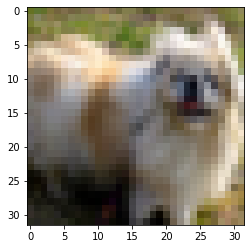

In [34]:
plt.imshow(x_train[40])

# Experimenting with models 

## Model 1

In [3]:
batch_size = 16
num_classes = 10
epochs = 40
#data_augmentation = True
num_predictions = 20

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5)) #dropout rate 50%
model.add(Dense(num_classes))
model.add(Activation('softmax'))



# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history5=model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))


Epoch 1/50
1563/1563 [==============================] - 17s 5ms/step - loss: 1.5325 - accuracy: 0.4375 - val_loss: 1.1566 - val_accuracy: 0.5976
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1460 - accuracy: 0.5910 - val_loss: 1.0145 - val_accuracy: 0.6446
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9904 - accuracy: 0.6531 - val_loss: 0.8568 - val_accuracy: 0.7018
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8963 - accuracy: 0.6859 - val_loss: 0.8277 - val_accuracy: 0.7176
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8319 - accuracy: 0.7079 - val_loss: 0.7444 - val_accuracy: 0.7439
Epoch 6/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7834 - accuracy: 0.7257 - val_loss: 0.7477 - val_accuracy: 0.7386
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7437 - accuracy: 0.7391 - val_loss: 0.7014 - val_accuracy

In [4]:
evaluation = model.evaluate(x_test, y_test_cat)
print('Test Loss: {}'.format(evaluation[0]))
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.6868 - accuracy: 0.7948
Test Loss: 0.6868305206298828
Test Accuracy: 0.7947999835014343


In [9]:
history = history5

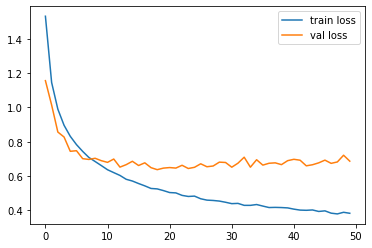

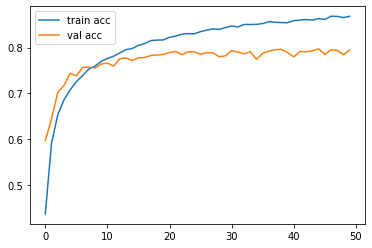

In [11]:
r = history
import matplotlib.pyplot as plt

# plot the loss.\
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Model 2

In [20]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))  #dropout rate 50%
model2.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history=model2.fit(x_train,y_train_cat,epochs=40,validation_data=(x_test,y_test_cat))

Epoch 1/40
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4587 - accuracy: 0.4965 - val_loss: 1.0367 - val_accuracy: 0.6265
Epoch 2/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0166 - accuracy: 0.6440 - val_loss: 0.8266 - val_accuracy: 0.7128
Epoch 3/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8807 - accuracy: 0.6946 - val_loss: 0.7516 - val_accuracy: 0.7378
Epoch 4/40
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7939 - accuracy: 0.7258 - val_loss: 0.8992 - val_accuracy: 0.6867
Epoch 5/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7300 - accuracy: 0.7495 - val_loss: 0.6845 - val_accuracy: 0.7585
Epoch 6/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6843 - accuracy: 0.7643 - val_loss: 0.6934 - val_accuracy: 0.7566
Epoch 7/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6426 - accuracy: 0.7786 - val_loss: 0.6458 - val_ac

In [21]:
evaluation = model2.evaluate(x_test, y_test_cat)
print('Test Loss: {}'.format(evaluation[0]))
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.5312 - accuracy: 0.8370
Test Loss: 0.5311524271965027
Test Accuracy: 0.8370000123977661


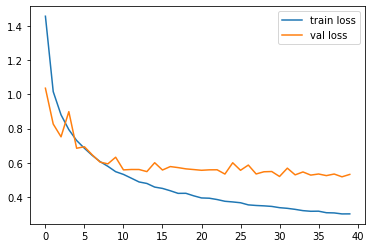

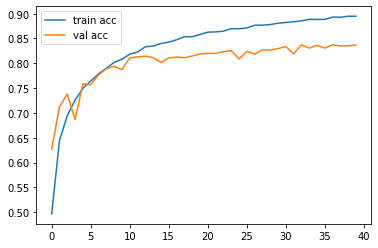

In [22]:
r = history
import matplotlib.pyplot as plt

# plot the loss.\
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Model 3

In [27]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))
model3.add(Dropout(0.3))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))  #dropout rate 50%
model3.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history6=model3.fit(x_train,y_train_cat,epochs=40,validation_data=(x_test,y_test_cat))

Epoch 1/40
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4307 - accuracy: 0.5076 - val_loss: 1.0678 - val_accuracy: 0.6323
Epoch 2/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0151 - accuracy: 0.6457 - val_loss: 0.8681 - val_accuracy: 0.6973
Epoch 3/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8880 - accuracy: 0.6915 - val_loss: 0.7719 - val_accuracy: 0.7307
Epoch 4/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8032 - accuracy: 0.7226 - val_loss: 0.8894 - val_accuracy: 0.6832
Epoch 5/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7391 - accuracy: 0.7438 - val_loss: 0.6417 - val_accuracy: 0.7738
Epoch 6/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6913 - accuracy: 0.7635 - val_loss: 0.6497 - val_accuracy: 0.7745
Epoch 7/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6532 - accuracy: 0.7750 - val_loss: 0.6803 - val_ac

In [28]:
evaluation = model3.evaluate(x_test, y_test_cat)
print('Test Loss: {}'.format(evaluation[0]))
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.5945 - accuracy: 0.8167
Test Loss: 0.5944544076919556
Test Accuracy: 0.8166999816894531


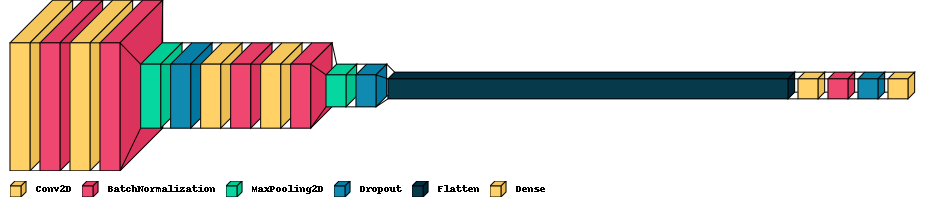

In [37]:
visualkeras.layered_view(model3, legend=True)

In [39]:
history = history6

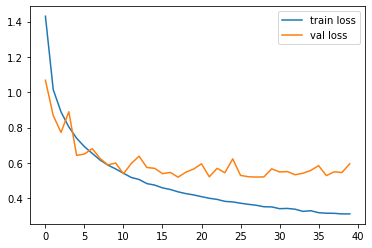

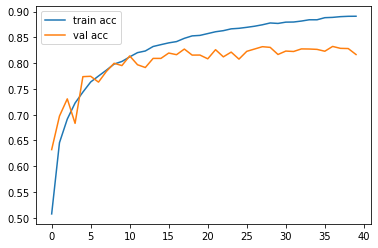

In [40]:
r = history
import matplotlib.pyplot as plt

# plot the loss.\
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Model 4

In [44]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model4.add(BatchNormalization())
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.3))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.4))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history7=model4.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

Epoch 1/50
1563/1563 [==============================] - 14s 8ms/step - loss: 1.5944 - accuracy: 0.4450 - val_loss: 1.1115 - val_accuracy: 0.5971
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0906 - accuracy: 0.6156 - val_loss: 0.9914 - val_accuracy: 0.6511
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9091 - accuracy: 0.6834 - val_loss: 0.7834 - val_accuracy: 0.7233
Epoch 4/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8041 - accuracy: 0.7233 - val_loss: 0.6644 - val_accuracy: 0.7690
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7310 - accuracy: 0.7504 - val_loss: 0.7201 - val_accuracy: 0.7518
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6666 - accuracy: 0.7722 - val_loss: 0.6654 - val_accuracy: 0.7736
Epoch 7/50
1563/1563 [==============================] - 16s 11ms/step - loss: 0.6229 - accuracy: 0.7869 - val_loss: 0.5890 - val_a

In [45]:
evaluation = model4.evaluate(x_test, y_test_cat)
print('Test Loss: {}'.format(evaluation[0]))
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.4358 - accuracy: 0.8660
Test Loss: 0.4357801675796509
Test Accuracy: 0.8659999966621399


In [46]:
history = history7

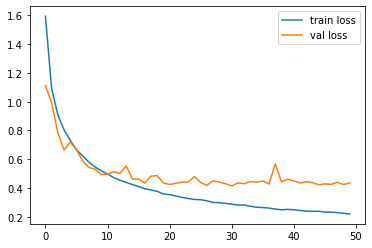

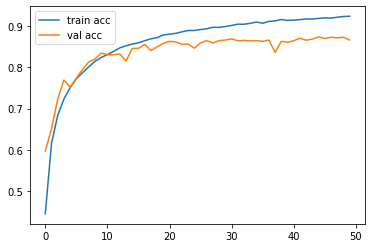

In [47]:
r = history
import matplotlib.pyplot as plt

# plot the loss.\
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


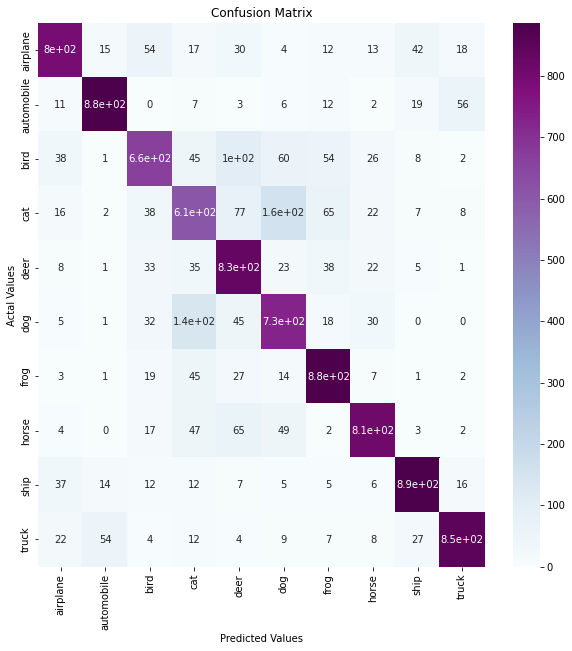

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

y_preds = model.predict(x_test)
y_pred=y_preds.argmax(axis=1)
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=class_names,
       columns=class_names)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True,cmap='BuPu')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [70]:
train_images = x_train

1/1 [==============================] - 0s 16ms/step


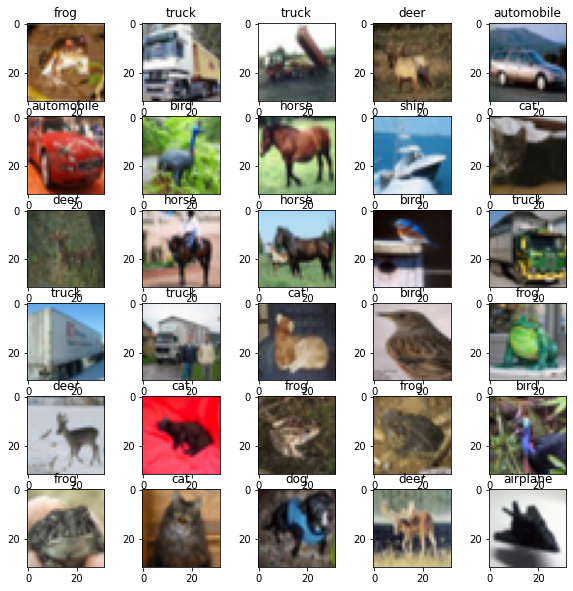

In [72]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(train_images[i])
    img = train_images[i]
    img = np.expand_dims(img, axis=0)    
    pred=  model.predict(img)
    pred=np.argmax(pred,axis=1)
    plt.title(rev_labels[pred[0]])